# Processing Base64 String Images in Python
This is an example of processing a base64 string image in Python and outputting the processed base64 image.

To use a base64 string image in Python, you need to decode the string using the `base64` module and then convert it into an image object using the `PIL` (Python Imaging Library) module. Once you have the image object, you can perform various image processing operations on it. Then, you'll need to convert it back to base64.

In [1]:
import base64
import numpy as np
import cv2
from IPython.display import display
from PIL import Image
from io import BytesIO

In [5]:
def image_from_base64(image_string):
    '''
    Takes a base64 image that has a URI prefix,
    and outputs an opencv numpy image.
    '''

    base64_without_URI = data_uri.split(',')[1]
    binary_data = base64.b64decode(base64_without_URI)

    # Convert binary data to numpy array
    np_arr = np.frombuffer(binary_data, dtype=np.uint8)
    
    # Decode the numpy array to an image
    image = cv2.imdecode(np_arr, cv2.IMREAD_COLOR)
    return image

def image_to_base64(image):
    '''
    Takes an opencv numpy image and
    outputs a base64 string with a URI prefix
    '''
    # Convert the OpenCV image to a PIL Image
    pil_image = Image.fromarray(image)

    # Display the black and white image in the Jupyter notebook
    display(pil_image)
    
    buffered = BytesIO()
    pil_image.save(buffered, format="png")

    # Encode the contents of the BytesIO object as base64
    base64_bytes = base64.b64encode(buffered.getvalue())

    # Convert the base64 bytes to a string
    base64_string = base64_bytes.decode('utf-8')

    # Add URI prefix to the base64 string
    uri_prefix = 'data:image/png;base64,'
    uri_string = uri_prefix + base64_string
    
    return uri_string

def display_bw_image(base64_str):
    '''
    Takes a base64 string PNG with a URI prefix,
    turns it black and white,
    then turns it into another base64 string PNG with a URI prefix
    '''
    image = image_from_base64(base64_str)
    greyscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # print(image, image.shape, type(image), len(image[0]), len(image))
    base64_string = image_to_base64(greyscale_image)
    return base64_string
    


In [6]:
# Read data URI from the file
with open('base64_example.txt', 'r') as file:
    data_uri = file.read()

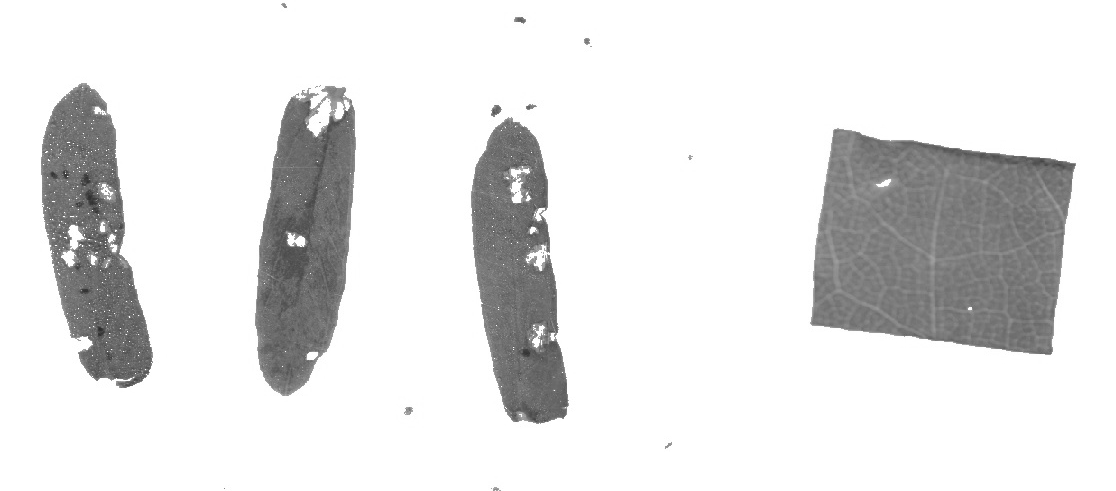

In [7]:
# Call the function to display the black and white image
base64_output = display_bw_image(data_uri)

In [8]:
# Write the base64 string to a file
with open('base64_output_test.txt', 'w') as f:
    f.write(base64_output)